In [8]:
import os
import sys
import json

# Add root folder of the project in sys.path
module_path = os.path.abspath(os.path.join('..'))  # Up on one level higher 
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt    

from plot_results import PrepareData, Calculations, PlotResults

In [2]:
# Create a list with of amounts of data for all experiments
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000]

# Create class instances
prepData = PrepareData()
calc = Calculations()
plot = PlotResults()

## Experiment 1 - MLP, 5 hidden layers

In [3]:
# Define global variabels fror the first experiment
base_path_exp2 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/cifar-10_dataset/cifar-10_output/exp_2(1)/weights_graphs_mlp"
layers_num_exp2 = 5

In [4]:
barcode_layers_exp2 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp2)

### Mean lifetime

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:180: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


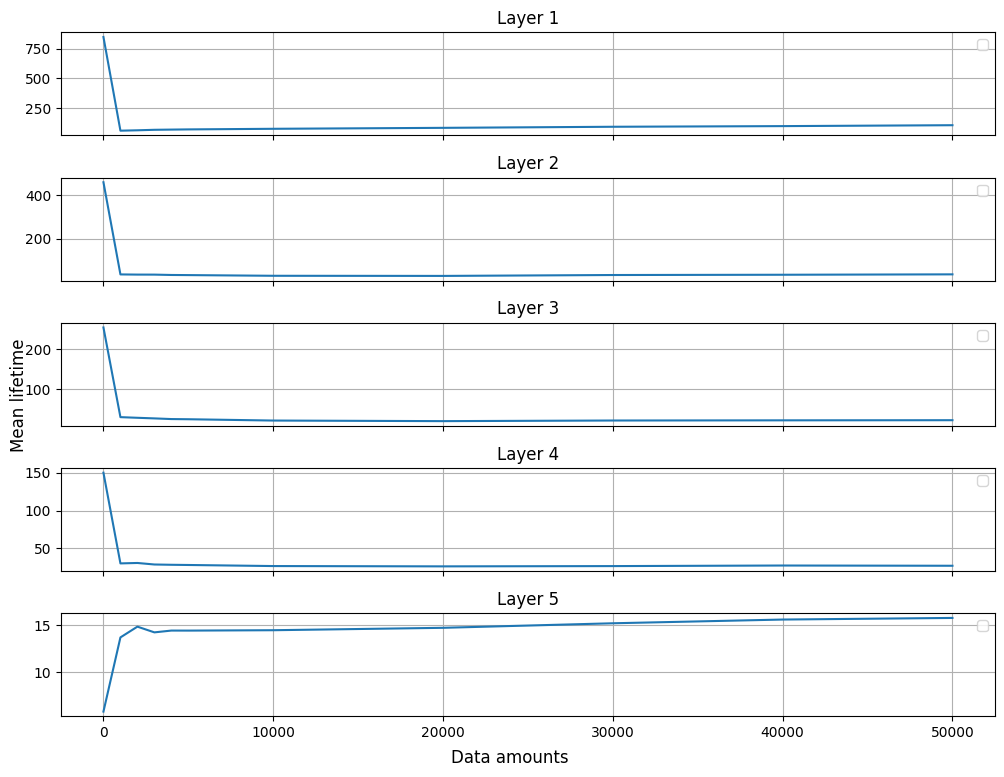

In [5]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp2 = list()

# Fill in created list
for i in range(layers_num_exp2):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp2[batch][i]))
    layers_homologies_ml_exp2.append(h_layer)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp2, label='Mean lifetime', layers_num=layers_num_exp2)

### Norm persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:180: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


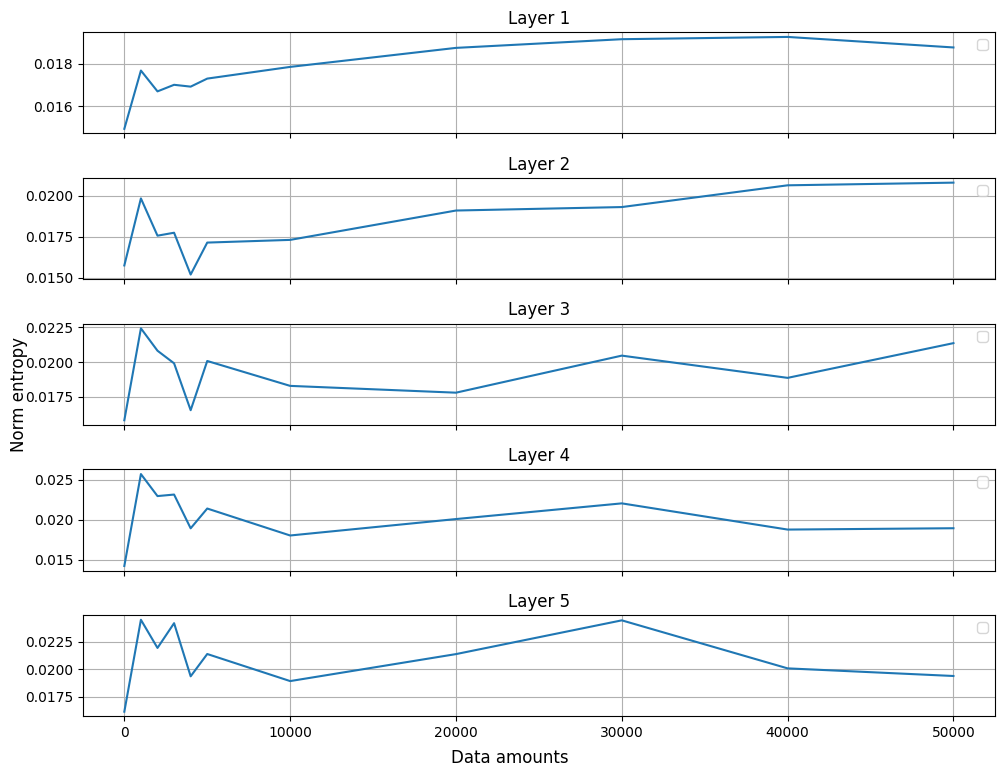

In [6]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp2 = list()

# Fill in created list
for q in range(layers_num_exp2):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp2[batch][q]))
    layers_norm_entropy_exp2.append(layer_norm_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp2, label='Norm entropy', layers_num=layers_num_exp2)

In [7]:
exp2_1_mse = dict()
exp2_2_mse = dict()
exp2_3_mse = dict()

for i in range(1, 4):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/cifar-10_dataset/cifar-10_output/exp_2({i})/weights_graphs_mlp"
    data_amounts_new = data_amounts[1:]
    for data in data_amounts_new:
        with open(base_path_losses+'_DataAmount'+str(data)+'/barcodes/f1_score_test.json', 'rt', encoding='utf-8') as file:
            mse = json.load(file)
            
        if i==1:
            exp2_1_mse.setdefault(data, mse['epoch20'])
        elif i==2:
            exp2_2_mse.setdefault(data, mse['epoch20'])
        elif i==3:
            exp2_3_mse.setdefault(data, mse['epoch20'])

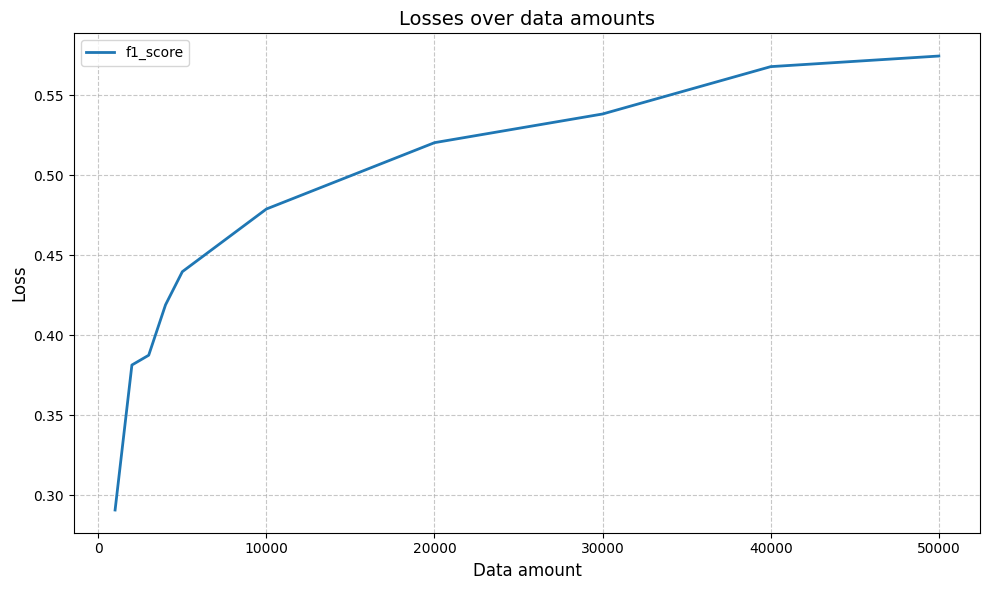

In [9]:
# Data preparation
f1_x = list(exp2_1_mse.keys())
f1_y = list(exp2_1_mse.values())

plt.figure(figsize=(10, 6))
plt.plot(f1_x, f1_y, markersize=8, linewidth=2, label='f1_score')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Losses over data amounts', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

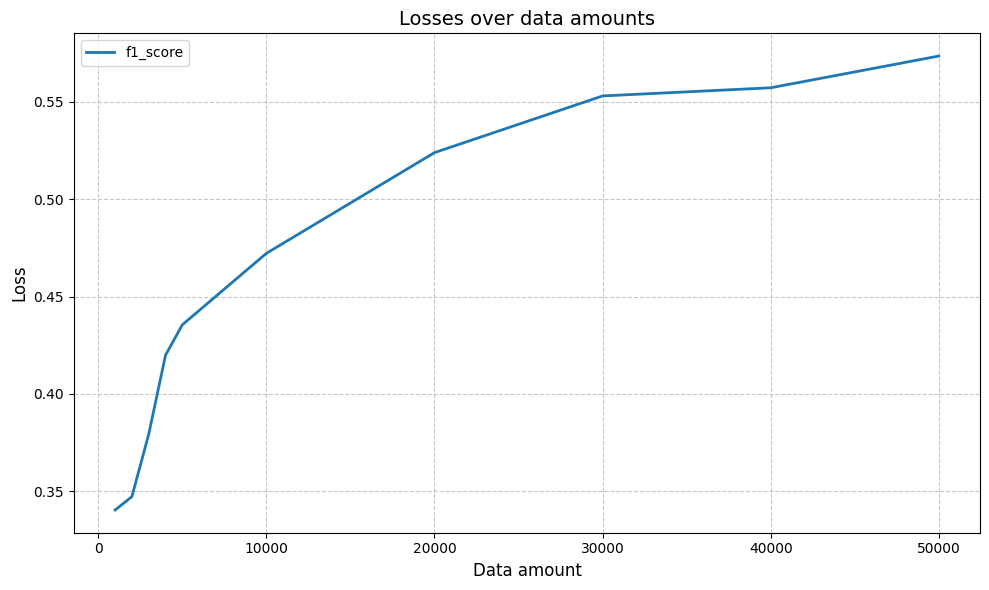

In [10]:
# Data preparation
f1_x = list(exp2_2_mse.keys())
f1_y = list(exp2_2_mse.values())

plt.figure(figsize=(10, 6))
plt.plot(f1_x, f1_y, markersize=8, linewidth=2, label='f1_score')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Losses over data amounts', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

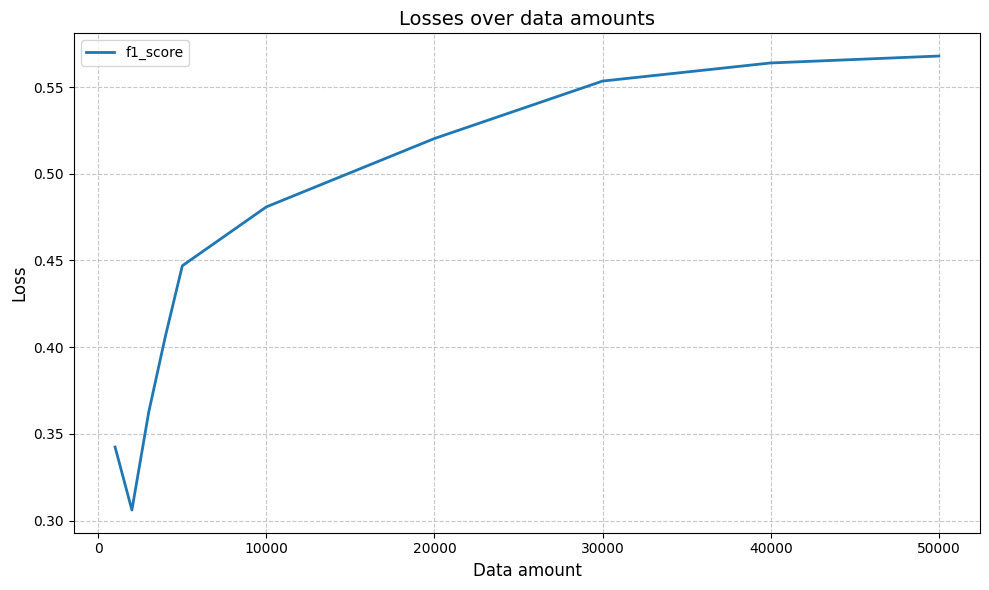

In [11]:
# Data preparation
f1_x = list(exp2_3_mse.keys())
f1_y = list(exp2_3_mse.values())

plt.figure(figsize=(10, 6))
plt.plot(f1_x, f1_y, markersize=8, linewidth=2, label='f1_score')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Losses over data amounts', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()